## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df_energy = pd.read_csv("energySoftware.csv", parse_dates=True)


<br>Started by loading the data set and now ill get the info to see what we are working with <br/>

In [3]:
df_energy.head()

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.010986,0.009155,,,3.165
1,bubblesort,0.013184,0.010925,,,3.069
2,bubblesort,0.015198,0.009399,,,2.617
3,bubblesort,0.010559,0.009583,,,2.572
4,bubblesort,0.009949,0.009949,,,2.671


In [4]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test    1441 non-null   object 
 1   PKG     1441 non-null   float64
 2   CPU     1441 non-null   float64
 3   nn      1441 non-null   object 
 4   nn2     1441 non-null   object 
 5   time    1441 non-null   float64
dtypes: float64(3), object(3)
memory usage: 67.7+ KB


In [5]:
df_energy.isnull().sum()

test    0
PKG     0
CPU     0
nn      0
nn2     0
time    0
dtype: int64

In [6]:

print(df_energy.describe())


               PKG          CPU         time
count  1441.000000  1441.000000  1441.000000
mean      0.017618     0.015021     3.009384
std       0.004464     0.003192     0.571439
min       0.008179     0.007812     1.962000
25%       0.013733     0.012939     2.462000
50%       0.017761     0.015747     3.363000
75%       0.020874     0.017822     3.524000
max       0.026794     0.020325     4.244000


In [7]:
print(df_energy['test'].unique())

['bubblesort' 'bubblesort_func' 'bubblesort_ll2' 'bubblesort_ll']




The dataset contains 1441 entries and 6 columns. The key columns include:
- `test`: The type of sorting test (e.g., 'bubblesort', 'bubblesort_func', 'bubblesort_ll2', 'bubblesort_ll').
- `CPU`: CPU usage measured during the tests.
- `time`: The time taken for the test.

From the `info()` output, we see that there are no missing values. The descriptive statistics indicate that CPU usage and time vary within a relatively small range, which suggests that differences between test types might be subtle.


### Plot the distribution of CPU for each test type

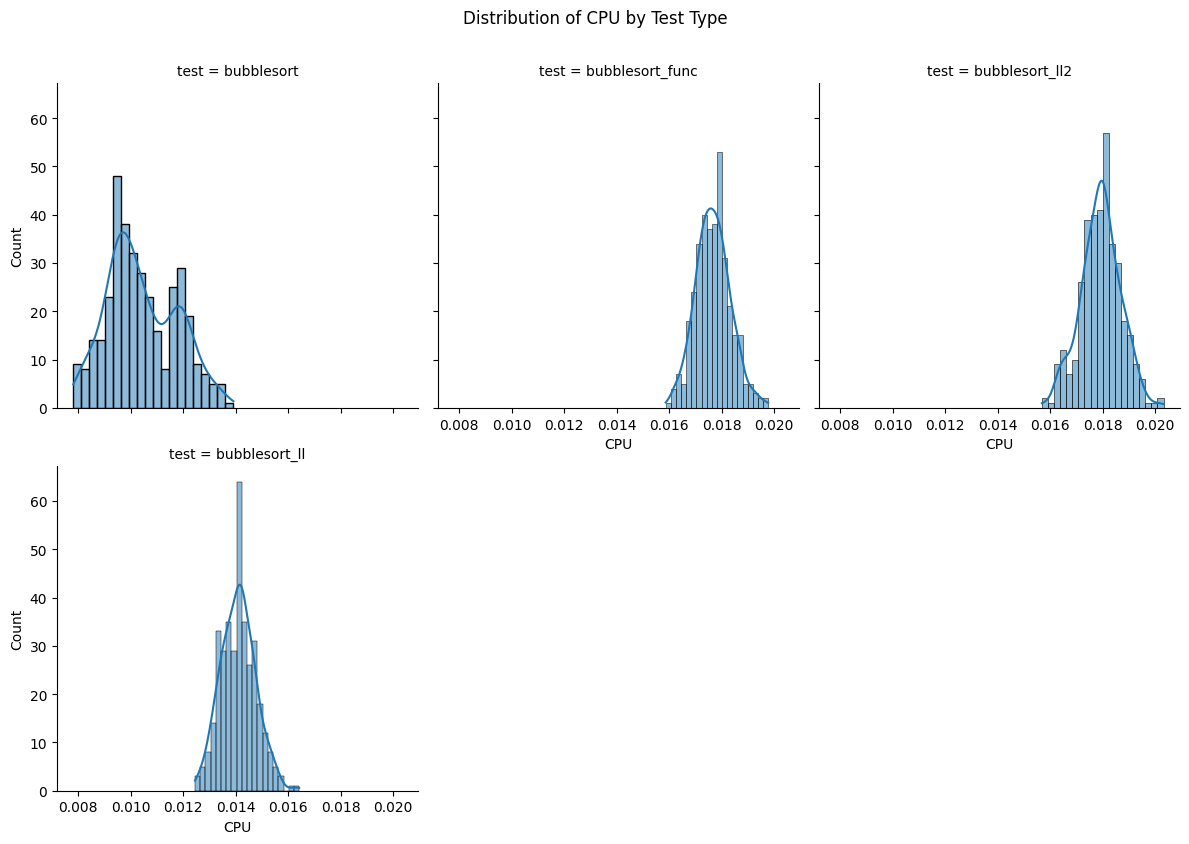

In [8]:
g = sns.FacetGrid(df_energy, col='test', col_wrap=3, height=4, sharex=True)
g.map(sns.histplot, 'CPU', kde=True, bins=20)
g.figure.suptitle('Distribution of CPU by Test Type', y=1.05)
plt.show()

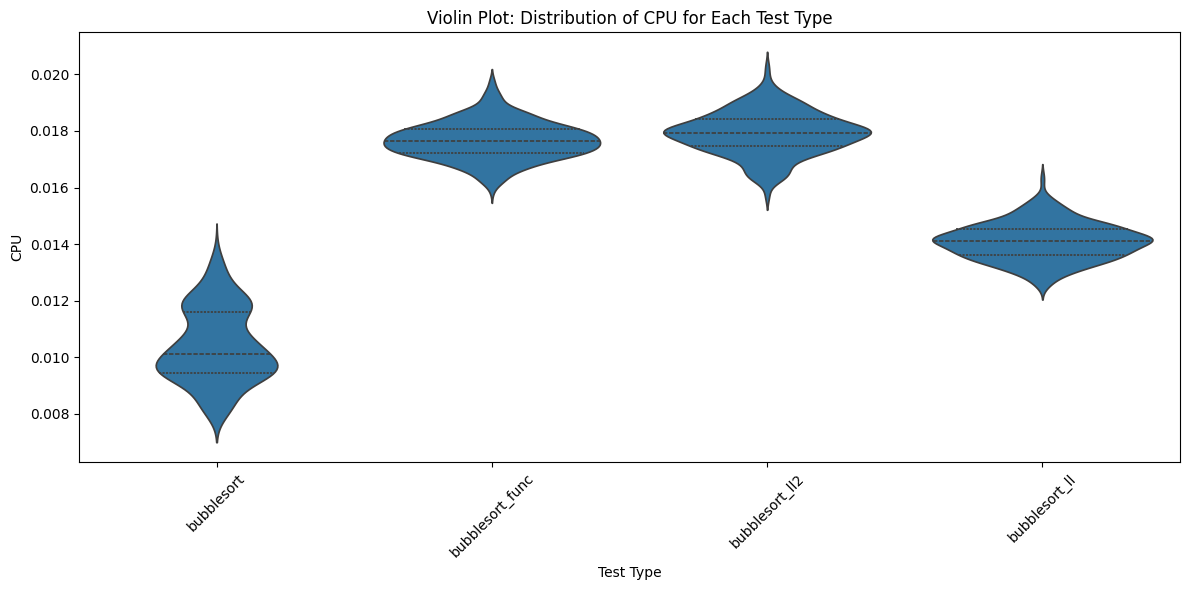

In [9]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='test', y='CPU', data=df_energy, inner='quartile')
plt.title("Violin Plot: Distribution of CPU for Each Test Type")
plt.xlabel("Test Type")
plt.ylabel("CPU")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plots show that each test type has its own pattern of CPU usage. For example, the distribution for bubblesort looks fairly symmetric, but with 2 peaks. In contrast the rest seems more normaly distributed. The violin plots also highlight these differences in central tendency and spread. Overall, most groups are roughly normal, but some show slight skewing.

let's test for normal distribution

In [10]:
# Assuming your dataframe is called df_energy
groups = df_energy['test'].unique()

# Loop through each group and perform the Shapiro-Wilk test on the CPU column
for group in groups:
    group_data = df_energy[df_energy['test'] == group]['CPU']
    stat, p = stats.shapiro(group_data)
    print(f"{group}: Shapiro-Wilk statistic = {stat:.3f}, p-value = {p:.3f}")

bubblesort: Shapiro-Wilk statistic = 0.971, p-value = 0.000
bubblesort_func: Shapiro-Wilk statistic = 0.995, p-value = 0.224
bubblesort_ll2: Shapiro-Wilk statistic = 0.995, p-value = 0.274
bubblesort_ll: Shapiro-Wilk statistic = 0.995, p-value = 0.269


bubblesort: The p-value is 0.000, which is below the 0.05 threshold. This means we reject the null hypothesis of normality, suggesting that the CPU data for bubblesort is not normally distributed.

bubblesort_func, bubblesort_ll2, and bubblesort_ll: Their p-values (0.224, 0.274, and 0.269 respectively) are above 0.05. This indicates that we do not have enough evidence to reject normality for these groups; their CPU data appears to be normally distributed.

### 2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 


The Shapiro-Wilk tests show that the CPU data for bubblesort is not normally distributed (p-value = 0.000), while bubblesort_ll appears normal (p-value = 0.269). Because one group violates the normality assumption and our samples are independent, a non-parametric test is more appropriate. Therefore, we use the Mann-Whitney U test.

the null hypothesis is that their is no difference

In [11]:

cpu_bubblesort = df_energy[df_energy['test'] == 'bubblesort']['CPU']
cpu_bubblesort_ll = df_energy[df_energy['test'] == 'bubblesort_ll']['CPU']

stat, p = stats.mannwhitneyu(cpu_bubblesort, cpu_bubblesort_ll, alternative='two-sided')
print("Mann-Whitney U statistic:", stat)
print("p-value:", p)

Mann-Whitney U statistic: 645.5
p-value: 3.79156286604797e-117


 Since the p-value is far below the 0.05 significance level, we reject the null hypothesis.

### 3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?


We use the Student’s t-test because both the bubblesort_func and bubblesort_ll2 groups show normally distributed CPU data, and the samples are independent. This test lets us directly compare their means to determine if the observed difference is statistically significant.

In [12]:
cpu_func = df_energy[df_energy['test'] == 'bubblesort_func']['CPU']
cpu_ll2 = df_energy[df_energy['test'] == 'bubblesort_ll2']['CPU']


t_stat, p_val = stats.ttest_ind(cpu_func, cpu_ll2, equal_var=True)
print("t-statistic:", t_stat)
print("p-value:", p_val)
mean_func = cpu_func.mean()
mean_ll2 = cpu_ll2.mean()
mean_diff = mean_func - mean_ll2
print(f"Mean CPU for bubblesort_func: {mean_func:.3f}")
print(f"Mean CPU for bubblesort_ll2: {mean_ll2:.3f}")
print(f"Mean difference: {mean_diff:.3f}")


t-statistic: -4.692273179928857
p-value: 3.2355729348933066e-06
Mean CPU for bubblesort_func: 0.018
Mean CPU for bubblesort_ll2: 0.018
Mean difference: -0.000


The t-test shows a statistically significant difference (p-value = 3.2355729348933066e-06) between bubblesort_func and bubblesort_ll2. However, the mean difference is nearly zero, indicating almost identical average CPU usage. With a large sample, even negligible differences can be statistically significant. In practice, the CPU performance of both methods is effectively the same.

### 4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).


lets start by looking at the distribution and test normality.

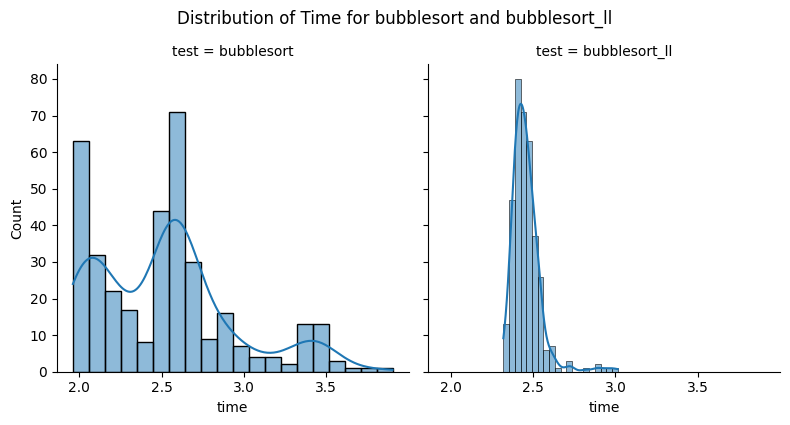

In [13]:
subset = df_energy[df_energy['test'].isin(['bubblesort', 'bubblesort_ll'])]


g = sns.FacetGrid(subset, col='test', col_wrap=2, height=4, sharex=True)
g.map(sns.histplot, 'time', kde=True, bins=20)
g.figure.suptitle('Distribution of Time for bubblesort and bubblesort_ll', y=1.05)
plt.show()

again bubblesort seems to not be normaly distributed, and bubblesort_ii seems to be more normaly distributed but with a tail on the right side/right skewed.

In [14]:
time_bubblesort = df_energy[df_energy['test'] == 'bubblesort']['time']
time_bubblesort_ll = df_energy[df_energy['test'] == 'bubblesort_ll']['time']

# Shapiro-Wilk test for normality
stat_b, p_b = stats.shapiro(time_bubblesort)
stat_ll, p_ll = stats.shapiro(time_bubblesort_ll)

print(f"bubblesort time: Shapiro-Wilk statistic = {stat_b:.3f}, p-value = {p_b:.3f}")
print(f"bubblesort_ll time: Shapiro-Wilk statistic = {stat_ll:.3f}, p-value = {p_ll:.3f}")

bubblesort time: Shapiro-Wilk statistic = 0.917, p-value = 0.000
bubblesort_ll time: Shapiro-Wilk statistic = 0.790, p-value = 0.000


from the test we acctually get that both does not have normal distribution.

Mann-Whitney U test is chosen, because the “time” data for both bubblesort and bubblesort_ll failed the normality test (p < 0.05). They are also independent groups, so a paired test is not appropriate. Mann-Whitney U does not assume normal distribution, making it the best fit under these conditions.

In [15]:

time_bubblesort = df_energy[df_energy['test'] == 'bubblesort']['time']
time_bubblesort_ll = df_energy[df_energy['test'] == 'bubblesort_ll']['time']


stat, p_value = stats.mannwhitneyu(time_bubblesort, time_bubblesort_ll, alternative='two-sided')

print("Mann-Whitney U statistic:", stat)
print("p-value:", p_value)

Mann-Whitney U statistic: 74960.0
p-value: 0.00035855213302219286


The Mann-Whitney U test gave a statistic of 74960.0 and a p-value of 0.00036, which is well below the 0.05 threshold. This indicates that there's a statistically significant difference in the "time" values between bubblesort and bubblesort_ll.

### 5. Perform an ANOVA test to test if there is a difference in means across groups for CPU


In [17]:
cpu_bubblesort       = df_energy[df_energy['test'] == 'bubblesort']['CPU']
cpu_bubblesort_func  = df_energy[df_energy['test'] == 'bubblesort_func']['CPU']
cpu_bubblesort_ll2   = df_energy[df_energy['test'] == 'bubblesort_ll2']['CPU']
cpu_bubblesort_ll    = df_energy[df_energy['test'] == 'bubblesort_ll']['CPU']

stats.f_oneway(cpu_bubblesort, cpu_bubblesort_func, cpu_bubblesort_ll2, cpu_bubblesort_ll)


F_onewayResult(statistic=np.float64(5641.93769602928), pvalue=np.float64(0.0))

a p-value of 0 show us their is difference in CPU for the differint test.  

### 6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [18]:
time_bubblesort       = df_energy[df_energy['test'] == 'bubblesort']['time']
time_bubblesort_func  = df_energy[df_energy['test'] == 'bubblesort_func']['time']
time_bubblesort_ll2   = df_energy[df_energy['test'] == 'bubblesort_ll2']['time']
time_bubblesort_ll    = df_energy[df_energy['test'] == 'bubblesort_ll']['time']

# Perform one-way ANOVA
stats.f_oneway(time_bubblesort, time_bubblesort_func, time_bubblesort_ll2, time_bubblesort_ll)


F_onewayResult(statistic=np.float64(2556.332935412784), pvalue=np.float64(0.0))

a p-value of 0 show their is a difference in time for the tests 